<a href="https://colab.research.google.com/github/ivanjrinacio/Challenger_Alura_Store/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [56]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [57]:
## Soma dos valores da coluna preço do df para determinar o faturamento de cada loja
## round para arredondar em 3 casas decimais e dividindo a soma por ser um valor na casa dos
faturamento_loja = round(loja["Preço"].sum()/1000000, 3)
faturamento_loja2 = round(loja2["Preço"].sum()/1000000, 3)
faturamento_loja3 = round(loja3["Preço"].sum()/1000000, 3)
faturamento_loja4 = round(loja4["Preço"].sum()/1000000, 3)


(1.3, 1.6)

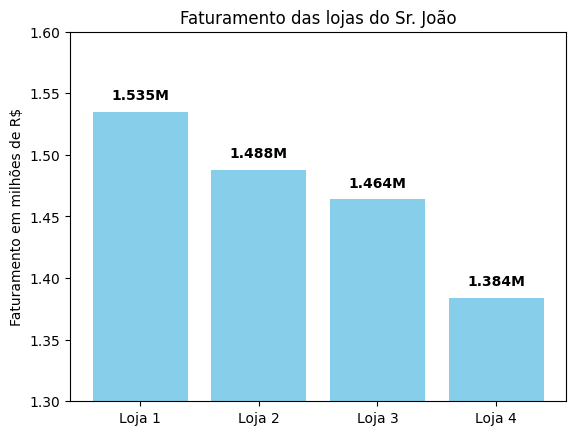

In [58]:
## Criando o gráfico de barras com o matplotlib e rotulando o gráfico
lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]
faturamentos = [faturamento_loja, faturamento_loja2, faturamento_loja3, faturamento_loja4]

plt.bar(lojas, faturamentos, color='skyblue')
plt.ylabel("Faturamento em milhões de R$")
plt.title("Faturamento das lojas do Sr. João")

# Adiciona o texto com o valor exato no topo de cada barra (espaço entre a barra e o valor é definido pela soma 0.01)
for i in range(len(lojas)):
    plt.text(i, faturamentos[i] + 0.01, f"{faturamentos[i]}M", ha='center', fontweight='bold')
    # O f"{faturamentos[i]}M" formata o número com um "M" de milhões

## Limite do eixo y
plt.ylim(1.3, 1.6)

# 2. Vendas por Categoria


# 3. Média de Avaliação das Lojas

# 4. Produtos Mais e Menos Vendidos

# 5. Frete Médio por Loja
